# 2

In [1]:
from load_datasets import train_val_generator, val_generator, train_generator, test_generator, X_train, X_val
from helper_functions import flatten_list, plot_and_print_model_metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
def model_cnn_2_classes(
    convolution_layers = [],
    mlp_layers = [],
    *,
    flatten_layer = [Flatten(name='flatten_layer')],
    name: str = "cnn_model_2_classes",
    optimizer=Adam(learning_rate=0.001),
    metrics=["acc"],
):
    model = Sequential(convolution_layers + flatten_layer + mlp_layers + [Dense(1, activation='sigmoid', name='output_layer')], name=name)
    model.compile(
        loss="binary_crossentropy", optimizer=optimizer, metrics=metrics
    )
    model.summary()
    return model

In [3]:
X_train.shape[1:]

(32, 32, 3)

In [4]:
input_shape = X_train.shape[1:]
kernel_numbers = [32, 64, 128, 128]
model_1__cnn_layers = flatten_list([
    [
        Conv2D(
            kernel_number,
            padding="same",
            kernel_size=(3, 3),
            activation="relu",
            kernel_initializer="he_normal",
            input_shape=(32, 32, 3),
        ),
        MaxPooling2D(pool_size=(2, 2), strides=2),
    ]
    for kernel_number in kernel_numbers
])
model_1__mlp_layers = [Dropout(.3), Dense(512, activation='relu', kernel_initializer='he_normal')]
model_1__cnn_layers, model_1__mlp_layers

([<keras.layers.convolutional.Conv2D at 0x18f3f43a460>,
  <keras.layers.core.dense.Dense at 0x18f3f4af250>])

In [5]:
model_1 = model_cnn_2_classes(model_1__cnn_layers, model_1__mlp_layers, name='model_1')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0   

In [6]:
early_stopper = EarlyStopping(monitor='val_acc', mode='max', patience=5, restore_best_weights=True)
steps_per_epoch =  int(len(X_train)/32)
validation_steps =  int(len(X_val)/32)
steps_per_epoch, validation_steps

(50, 12)

Epoch 1/100
50/50 [==============================] - 6s 18ms/step - loss: 0.7781 - acc: 0.5056 - val_loss: 0.7391 - val_acc: 0.0260
Epoch 2/100
50/50 [==============================] - 1s 15ms/step - loss: 0.6943 - acc: 0.5125 - val_loss: 0.6954 - val_acc: 0.4948
Epoch 3/100
50/50 [==============================] - 1s 15ms/step - loss: 0.6911 - acc: 0.5512 - val_loss: 0.6262 - val_acc: 0.9297
Epoch 4/100
50/50 [==============================] - 1s 15ms/step - loss: 0.6906 - acc: 0.5544 - val_loss: 0.8149 - val_acc: 0.1068
Epoch 5/100
50/50 [==============================] - 1s 15ms/step - loss: 0.6802 - acc: 0.5556 - val_loss: 0.6052 - val_acc: 0.8411
Epoch 6/100
50/50 [==============================] - 1s 16ms/step - loss: 0.6766 - acc: 0.5806 - val_loss: 0.7037 - val_acc: 0.4766
Epoch 7/100
50/50 [==============================] - 1s 15ms/step - loss: 0.6673 - acc: 0.5906 - val_loss: 0.5294 - val_acc: 0.9271
Epoch 8/100
50/50 [==============================] - 1s 15ms/step - loss: 0.

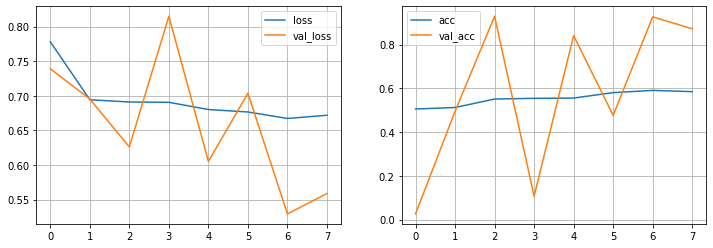

In [7]:
def fit_then_evaluate_model(model):
    model.fit(
        train_val_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=100,
        callbacks=[early_stopper],
        validation_data=val_generator,
        validation_steps=validation_steps,
    )
    plot_and_print_model_metrics(model)

fit_then_evaluate_model(model_1)